In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sns.set_style('whitegrid')
sns.set_palette("muted")
# 修改工作路径，使本.ipynb文件能够像在本文件夹根目录下一样导入其他模块
# Modify the working path so that this.ipynb file can import other modules like in the root directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(current_dir, '..'))

In [2]:
# 超参数
num_epochs = 10  # 训练的轮数
learning_rate = 0.001 # 学习率
input_len = 100  # 输入长度
output_len = 20  # 输出长度
label_len = 8 # 标签长度
input_channels = 10  # 输入通道数
output_channels = 10  # 输出通道数
batch_size = 64  # 批大小
#device = 'cpu'  # 设备

data_paths=["E:\\科创优才\\实验数据\\毕设实验数据\\Testo20240509.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\testo20240511数据.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\烟气数据20240514.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\⁭烟气数据20240516.xlsx"]

var_names=['% O2', 'ppm CO', '% CO2', 'ppm NO', 'ppm NO2', '°C 烟温', 'ppm NOx', 'ppm SO2', '°C 环温', 'l/min 泵流量']

In [13]:
d=pd.concat([pd.read_excel(data_paths[i])[["日期／时间"]+var_names] for i in range(len(data_paths))])

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28711 entries, 0 to 7759
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   日期／时间      28711 non-null  datetime64[ns]
 1   % O2       28711 non-null  float64       
 2   ppm CO     28711 non-null  int64         
 3   % CO2      28711 non-null  object        
 4   ppm NO     28711 non-null  int64         
 5   ppm NO2    28711 non-null  float64       
 6   °C 烟温      28711 non-null  object        
 7   ppm NOx    28711 non-null  float64       
 8   ppm SO2    28711 non-null  int64         
 9   °C 环温      28711 non-null  float64       
 10  l/min 泵流量  28711 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 2.6+ MB


In [15]:
d.describe()

,日期／时间,% O2,ppm CO,ppm NO,ppm NO2,ppm NOx,ppm SO2,°C 环温,l/min 泵流量
count,28711,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000,28711.000000
mean,2024-05-13 04:24:17.068858624,15.613160,55.237331,4.531991,0.795601,5.327592,1.360524,28.095455,0.982312
min,2024-05-09 15:30:24,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,25.400000,0.320000
25%,2024-05-11 14:46:17.500000,4.660000,0.000000,0.000000,0.300000,0.300000,0.000000,27.200000,0.980000
50%,2024-05-14 14:44:20,20.840000,1.000000,0.000000,0.400000,0.400000,1.000000,28.000000,0.980000
75%,2024-05-15 14:20:39.500000,20.910000,3.000000,10.000000,1.400000,12.200000,1.000000,28.600000,0.990000
max,2024-05-15 16:20:17,20.980000,10441.000000,27.000000,8.400000,29.000000,218.000000,31.300000,1.240000
std,NaN,8.013602,394.865106,7.486168,0.956886,8.070523,8.039027,1.330979,0.024779


<Axes: >

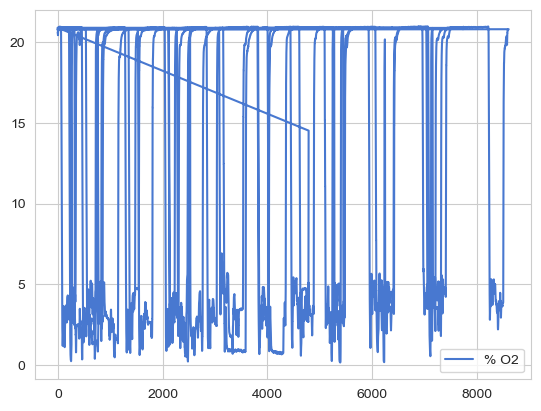

In [19]:
d.plot.line(y='% O2')

(array([5.2000e+01, 6.3000e+01, 1.8200e+02, 5.4900e+02, 1.2200e+02,
        1.7000e+02, 1.9900e+02, 2.2600e+02, 2.2700e+02, 1.9900e+02,
        3.6200e+02, 5.2800e+02, 6.0800e+02, 4.3900e+02, 4.4900e+02,
        6.4200e+02, 5.1200e+02, 4.3000e+02, 3.4800e+02, 2.8900e+02,
        3.9200e+02, 3.3800e+02, 2.6300e+02, 2.0000e+02, 9.4000e+01,
        7.9000e+01, 5.2000e+01, 2.9000e+01, 2.3000e+01, 2.3000e+01,
        1.4000e+01, 1.3000e+01, 1.4000e+01, 1.1000e+01, 6.0000e+00,
        9.0000e+00, 1.2000e+01, 9.0000e+00, 9.0000e+00, 7.0000e+00,
        1.0000e+01, 8.0000e+00, 4.0000e+00, 8.0000e+00, 1.2000e+01,
        7.0000e+00, 8.0000e+00, 5.0000e+00, 1.4000e+01, 7.0000e+00,
        1.2000e+01, 8.0000e+00, 1.0000e+01, 1.1000e+01, 1.2000e+01,
        1.1000e+01, 8.0000e+00, 1.0000e+01, 9.0000e+00, 1.5000e+01,
        1.0000e+01, 1.3000e+01, 6.0000e+00, 1.2000e+01, 1.0000e+01,
        8.0000e+00, 9.0000e+00, 1.8000e+01, 1.4000e+01, 1.5000e+01,
        1.3000e+01, 1.3000e+01, 1.9000e+01, 1.30

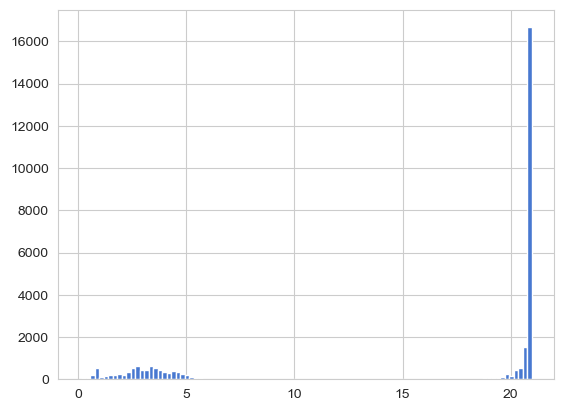

In [20]:
plt.hist(d['% O2'], bins=100)